In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#load mdtraj
import mdtraj as md
plt.rcParams['figure.figsize'] = (8, 8)
plt.rcParams['font.size'] = 15

/home/lz2826/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/lz2826/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/lz2826/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/lz2826/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


In [3]:
file = pd.read_csv('./COLVAR',skiprows=5,sep='\s+',header=None)
file.columns = [ "Time (ps)","phi","psi" ]
file

,Time (ps),phi,psi
0,0.0,1.157159,0.131158
1,1.0,1.057037,-0.517175
2,2.0,0.692652,-1.702588
3,3.0,1.100734,-1.502531
4,4.0,1.069284,-0.320494
...,...,...,...
99996,99996.0,1.272236,-0.754607
99997,99997.0,1.255695,-0.492662
99998,99998.0,1.250587,-0.479439
99999,99999.0,1.152444,-0.890501


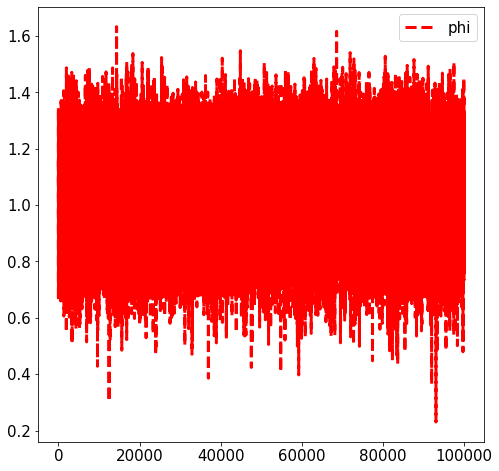

In [4]:
plt.plot(file["Time (ps)"],file["phi"], 'r',linewidth=3,linestyle='dashed',label='phi')
plt.legend()
plt.show()


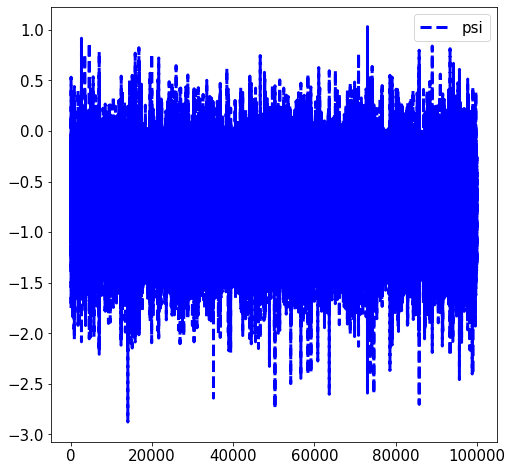

In [5]:
plt.plot(file["Time (ps)"],file["psi"], 'b',linewidth=3,linestyle='dashed',label='psi')
plt.legend()
plt.show()


In [6]:
xtc_file = "./traj_comp.xtc"
gro_f = './confout.gro'
traj = md.load(xtc_file,top= gro_f)
x,phi1 = md.compute_phi(traj, periodic=True, opt=True)
y,psi1 = md.compute_psi(traj, periodic=True, opt=True)
print(phi1,psi1)

[[1.1571589 ]
 [1.0570375 ]
 [0.69265336]
 ...
 [1.2505863 ]
 [1.1524444 ]
 [1.2949666 ]] [[ 0.13115838]
 [-0.5171774 ]
 [-1.7025892 ]
 ...
 [-0.47943798]
 [-0.8905013 ]
 [-1.3798848 ]]


In [7]:
df_mdtraj = pd.DataFrame({'phi':phi1.flatten(),'psi':psi1.flatten()})
df_mdtraj

,phi,psi
0,1.157159,0.131158
1,1.057037,-0.517177
2,0.692653,-1.702589
3,1.100735,-1.502532
4,1.069284,-0.320493
...,...,...
99996,1.272234,-0.754607
99997,1.255695,-0.492661
99998,1.250586,-0.479438
99999,1.152444,-0.890501


In [8]:
ls_get=[]
for i in range(len(df_mdtraj)):
    if i%1000==0:
        ls_get.append(i)
print(ls_get)
df2=df_mdtraj.loc[ls_get]
df2

[0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000, 21000, 22000, 23000, 24000, 25000, 26000, 27000, 28000, 29000, 30000, 31000, 32000, 33000, 34000, 35000, 36000, 37000, 38000, 39000, 40000, 41000, 42000, 43000, 44000, 45000, 46000, 47000, 48000, 49000, 50000, 51000, 52000, 53000, 54000, 55000, 56000, 57000, 58000, 59000, 60000, 61000, 62000, 63000, 64000, 65000, 66000, 67000, 68000, 69000, 70000, 71000, 72000, 73000, 74000, 75000, 76000, 77000, 78000, 79000, 80000, 81000, 82000, 83000, 84000, 85000, 86000, 87000, 88000, 89000, 90000, 91000, 92000, 93000, 94000, 95000, 96000, 97000, 98000, 99000, 100000]


,phi,psi
0,1.157159,0.131158
1000,1.091991,-1.105434
2000,1.118764,-0.776709
3000,0.830097,-0.917253
4000,1.015126,-0.592140
...,...,...
96000,1.063145,-0.969478
97000,1.132272,-0.903833
98000,1.106677,-0.937684
99000,1.055214,-0.343313


In [9]:
ls_get1=[]
for i in range(len(file)):
    if i%1000==0:
        ls_get1.append(i)
print(ls_get1)
file2=file.loc[ls_get1]
file2

[0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 20000, 21000, 22000, 23000, 24000, 25000, 26000, 27000, 28000, 29000, 30000, 31000, 32000, 33000, 34000, 35000, 36000, 37000, 38000, 39000, 40000, 41000, 42000, 43000, 44000, 45000, 46000, 47000, 48000, 49000, 50000, 51000, 52000, 53000, 54000, 55000, 56000, 57000, 58000, 59000, 60000, 61000, 62000, 63000, 64000, 65000, 66000, 67000, 68000, 69000, 70000, 71000, 72000, 73000, 74000, 75000, 76000, 77000, 78000, 79000, 80000, 81000, 82000, 83000, 84000, 85000, 86000, 87000, 88000, 89000, 90000, 91000, 92000, 93000, 94000, 95000, 96000, 97000, 98000, 99000, 100000]


,Time (ps),phi,psi
0,0.0,1.157159,0.131158
1000,1000.0,1.091991,-1.105434
2000,2000.0,1.118763,-0.776707
3000,3000.0,0.830099,-0.917254
4000,4000.0,1.015128,-0.592140
...,...,...,...
96000,96000.0,1.063145,-0.969479
97000,97000.0,1.132273,-0.903833
98000,98000.0,1.106675,-0.937683
99000,99000.0,1.055216,-0.343314


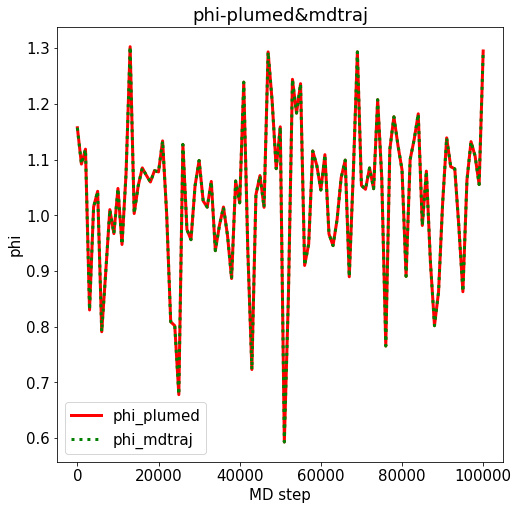

<Figure size 576x576 with 0 Axes>

In [11]:
plt.plot(file2["Time (ps)"],file2["phi"], 'r',linewidth=3,linestyle='solid',label='phi_plumed')
plt.plot(file2["Time (ps)"],df2['phi'], 'g',linewidth=3,linestyle='dotted',label='phi_mdtraj')
plt.title('phi-plumed&mdtraj')
plt.xlabel('MD step')
plt.ylabel('phi')
plt.legend()
plt.show()
plt.savefig('../pic/phi-plumed&mdtraj.png')

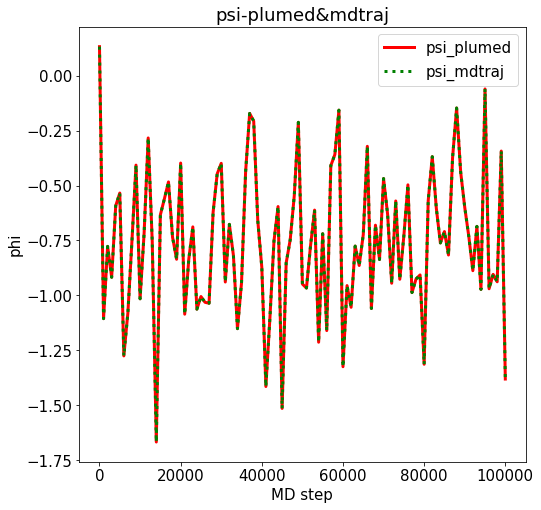

<Figure size 576x576 with 0 Axes>

In [12]:
plt.plot(file2["Time (ps)"],file2["psi"], 'r',linewidth=3,linestyle='solid',label='psi_plumed')
plt.plot(file2["Time (ps)"],df2['psi'], 'g',linewidth=3,linestyle='dotted',label='psi_mdtraj')
plt.title('psi-plumed&mdtraj')
plt.xlabel('MD step')
plt.ylabel('phi')
plt.legend()
plt.show()
plt.savefig('../pic/psi-plumed&mdtraj.png')

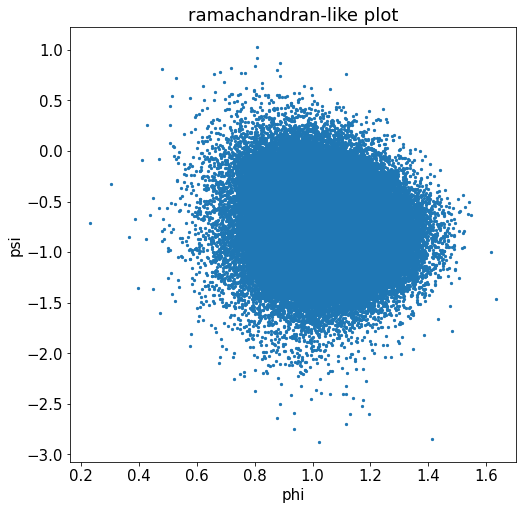

<Figure size 576x576 with 0 Axes>

In [13]:
plt.scatter(file["phi"], file["psi"], s=5)
plt.xlabel('phi')
plt.ylabel('psi')
plt.title('ramachandran-like plot')
#plt.legend()
plt.show()
plt.savefig('../pic/ramachandran-like_plot.png')

In [14]:
phi_std= np.std(file["phi"], ddof = 1)
psi_std= np.std(file["psi"], ddof = 1)
print(phi_std,psi_std)

0.13238242814224294 0.34453614703655894


In [15]:
phi_std_1000= np.std(file2["phi"], ddof = 1)
psi_std_1000= np.std(file2["psi"], ddof = 1)
print(phi_std_1000,psi_std_1000)

0.1315996550951791 0.3266779784784789


In [16]:
df_grid = pd.read_csv('../Inputs1/topolA.grid.dat',skiprows=5,sep='\s+',header=None)
df_grid.columns = [ 'phi', 'metad.bias', 'der_phi']
df_grid

,phi,metad.bias,der_phi
0,-3.141593,106.130797,47.374423
1,-3.041860,110.421469,38.572384
2,-2.942126,113.811566,29.137372
3,-2.842393,116.257025,19.782807
4,-2.742660,117.797396,11.107683
...,...,...,...
58,2.642927,76.847504,57.644533
59,2.742660,82.839716,62.147292
60,2.842393,89.096305,62.901574
61,2.942126,95.252959,60.297751


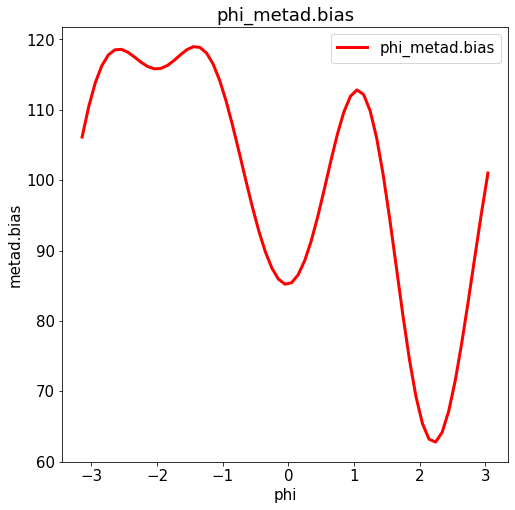

<Figure size 576x576 with 0 Axes>

In [17]:
plt.plot(df_grid['phi'],df_grid['metad.bias'], 'r',linewidth=3,linestyle='solid',label='phi_metad.bias')
plt.title('phi_metad.bias')
plt.xlabel('phi')
plt.ylabel('metad.bias')
plt.legend()
plt.show()
plt.savefig('../pic/Estimate of the free energy as a function of the dihedral phi from a 10ns-long well-tempered metadynamics simulation.png')

In [18]:
df_hill = pd.read_csv('../Inputs1/HILLS',skiprows=5,sep='\s+',header=None)
df_hill.columns = [ 'time', 'phi','sigma_phi', 'height','biasf']
df_hill

,time,phi,sigma_phi,height,biasf
0,1,-2.313841,0.5,1.333333,10
1,2,-1.392153,0.5,1.320363,10
2,3,-1.924879,0.5,1.243806,10
3,4,-1.436332,0.5,1.212346,10
4,5,-1.304818,0.5,1.171763,10
...,...,...,...,...,...
9995,9996,-1.468186,0.5,0.006678,10
9996,9997,-1.081230,0.5,0.007923,10
9997,9998,-0.620493,0.5,0.016269,10
9998,9999,0.977166,0.5,0.008944,10


In [19]:
df_fes = pd.read_csv('../Inputs1/fes.dat',skiprows=5,sep='\s+',header=None)
df_fes.columns = [ 'phi' ,'file.free', 'der_phi']
df_fes

,phi,file.free,der_phi
0,-3.141593,-117.974043,-52.723972
1,-2.967060,-125.661136,-35.104311
2,-2.792527,-130.185335,-17.103690
3,-2.617994,-131.807943,-2.356084
4,-2.443461,-131.345734,6.471708
5,-2.268928,-129.964452,8.161783
6,-2.094395,-128.861104,3.649523
7,-1.919862,-128.854884,-3.664831
8,-1.745329,-130.012898,-8.885690
9,-1.570796,-131.572536,-7.769536


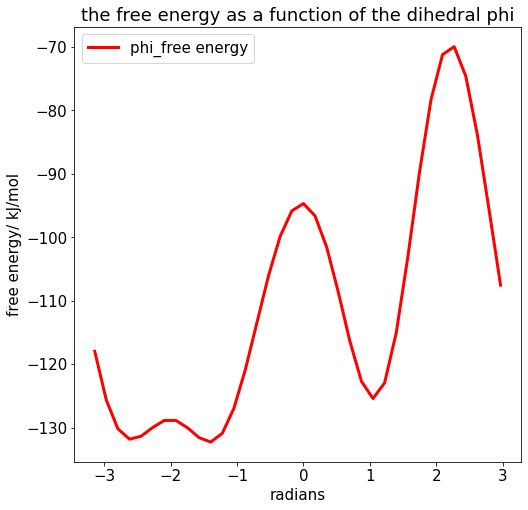

<Figure size 576x576 with 0 Axes>

In [20]:
plt.plot(df_fes['phi'],df_fes['file.free'], 'r',linewidth=3,linestyle='solid',label='phi_free energy')
plt.title('the free energy as a function of the dihedral phi')
plt.xlabel('radians')
plt.ylabel('free energy/ kJ/mol')
plt.legend()
plt.show()
plt.savefig('../pic/Estimate of the free energy as a function of the dihedral phi from a 10ns-long well-tempered metadynamics simulation.png')

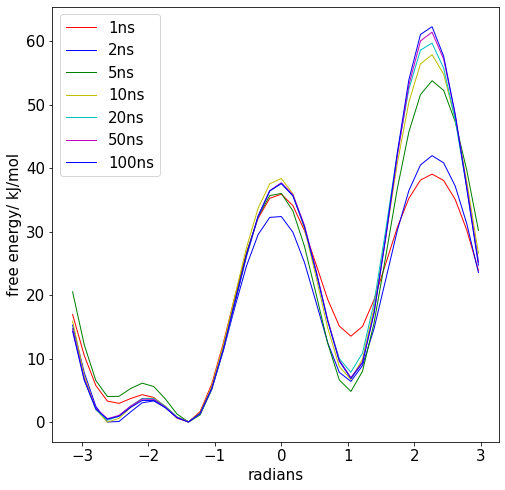

<Figure size 576x576 with 0 Axes>

In [23]:
ls_ns=[['1','r'],
       ['2','b'],
       ['5','g'],
       ['10','y'],
       ['20','c'],
       ['50','m'],
       ['100','b']]
for i in ls_ns:
    path= '../Inputs1/fes_'+i[0]+'.dat'
    df_fes1 = pd.read_csv(path,skiprows=5,sep='\s+',header=None)
    df_fes1.columns = [ 'phi' ,'file.free', 'der_phi']
    plt.plot(df_fes1['phi'],df_fes1['file.free'], i[1],linewidth=1,linestyle='solid',label=i[0]+'ns')
plt.xlabel('radians')
plt.ylabel('free energy/ kJ/mol')
plt.legend()
plt.show()   
plt.savefig('../pic/Estimates of the free energy as a function of the dihedral phi calculated every 100 Gaussian kernels deposited.png')